# Домашнее задание HW02

Работа с табличными данными в Pandas, контроль качества данных, базовый EDA и визуализация в Matplotlib.


## 1. Загрузка данных и первичный осмотр


In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Настройка для корректного отображения графиков
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)


In [2]:
# Загрузка учебного датасета
df = pd.read_csv('S02-hw-dataset.csv')
print("Данные успешно загружены!")
print(f"Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")


Данные успешно загружены!
Размер датасета: 41 строк, 5 столбцов


### 1.1. Первые строки датасета


In [3]:
# Вывод первых строк датасета
df.head(10)


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


### 1.2. Информация о столбцах и типах данных


In [4]:
# Информация о структуре датасета
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


### 1.3. Базовые описательные статистики


In [5]:
# Описательные статистики для числовых столбцов
df.describe()


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


## 2. Пропуски, дубликаты и базовый контроль качества


### 2.1. Анализ пропусков


In [6]:
# Доля пропусков в каждом столбце
missing_data = df.isna().mean() * 100
print("Доля пропусков по столбцам (%):")
print(missing_data)
print(f"\nОбщее количество пропусков: {df.isna().sum().sum()}")


Доля пропусков по столбцам (%):
user_id      0.000000
age          4.878049
country      0.000000
purchases    0.000000
revenue      0.000000
dtype: float64

Общее количество пропусков: 2


### 2.2. Проверка дубликатов


In [7]:
# Проверка полностью дублирующих строк
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(f"Количество полностью дублирующих строк: {num_duplicates}")

if num_duplicates > 0:
    print("\nДублирующие строки:")
    print(df[duplicates])


Количество полностью дублирующих строк: 1

Дублирующие строки:
    user_id   age country  purchases  revenue
40       10  24.0      RU          7      511


### 2.3. Поиск подозрительных значений


In [8]:
# Проверка 1: количество покупок не может быть отрицательным
negative_purchases = df[df['purchases'] < 0]
print("Строки с отрицательным количеством покупок:")
print(negative_purchases)
print(f"\nКоличество таких строк: {len(negative_purchases)}")


Строки с отрицательным количеством покупок:
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785

Количество таких строк: 1


In [9]:
# Проверка 2: Нереалистичные значения возраста (возраст > 100 или < 0)
unrealistic_age = df[(df['age'] > 100) | (df['age'] < 0)]
print("Строки с нереалистичным возрастом (<= 0 или > 100):")
print(unrealistic_age)
print(f"\nКоличество таких строк: {len(unrealistic_age)}")


Строки с нереалистичным возрастом (<= 0 или > 100):
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785

Количество таких строк: 1


In [10]:
# Проверка 3: Нулевой доход при ненулевом кол-ве покупок
zero_revenue_with_purchases = df[(df['purchases'] > 0) & (df['revenue'] == 0)]
print("Строки с ненулевыми покупками, но нулевым доходом:")
print(zero_revenue_with_purchases)
print(f"\nКоличество таких строк: {len(zero_revenue_with_purchases)}")


Строки с ненулевыми покупками, но нулевым доходом:
    user_id   age country  purchases  revenue
10       11  24.0      US          4        0

Количество таких строк: 1


### 2.4. Резюме по качеству данных

**Обнаруженные проблемы:**

1. В столбце `age` обнаружены пропущенные значения.

2. Обнаружена одна полностью дублирующая строка (user_id=10 встречается дважды).

3. В столбце `purchases` найдено отрицательное значение (-1), что логически невозможно для количества покупок.

4. Обнаружен возраст 120 лет, что может быть ошибкой ввода данных.

5. Найден случай, когда есть покупки, но доход равен 0.

Эти проблемы могут влиять на качество анализа.


## 3. Базовый EDA: группировки, агрегаты и частоты


### 3.1. Частоты для категориальных переменных


In [12]:
# Частота встречаемости стран
country_counts = df['country'].value_counts()
print("Распределение пользователей по странам:")
print(country_counts)
print(f"\nДоля каждой страны (%):")
print((country_counts / len(df) * 100).round(2))


Распределение пользователей по странам:
country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

Доля каждой страны (%):
country
RU    31.71
FR    29.27
US    19.51
DE    14.63
CN     4.88
Name: count, dtype: float64


### 3.2. Группировки с агрегатами


In [13]:
# Группировка по странам: средние и суммарные значения
country_stats = df.groupby('country').agg({
    'purchases': ['mean', 'sum', 'count'],
    'revenue': ['mean', 'sum'],
    'age': 'mean'
}).round(2)

print("Статистика по странам:")
print(country_stats)


Статистика по странам:
        purchases            revenue           age
             mean sum count     mean    sum   mean
country                                           
CN           4.50   9     2  1054.00   2108  24.00
DE           6.50  39     6  1445.50   8673  34.60
FR           4.25  51    12   675.92   8111  46.25
RU           4.77  62    13   790.08  10271  30.08
US           4.62  37     8   557.38   4459  36.71


In [14]:
# Группировка по странам: средний доход на покупку
df_clean = df[df['purchases'] > 0].copy()  # Исключаем нулевые покупки для корректного расчета
df_clean['revenue_per_purchase'] = df_clean['revenue'] / df_clean['purchases']

revenue_per_purchase_by_country = df_clean.groupby('country')['revenue_per_purchase'].mean().sort_values(ascending=False)
print("Средний доход на одну покупку по странам:")
print(revenue_per_purchase_by_country.round(2))


Средний доход на одну покупку по странам:
country
CN    232.00
DE    223.67
RU    168.55
FR    143.30
US    135.75
Name: revenue_per_purchase, dtype: float64


### 3.3. Создание возрастных групп


In [15]:
# Создание возрастных групп
df_with_age_groups = df[df['age'].notna()].copy()  # Исключаем пропуски
df_with_age_groups['age_group'] = pd.cut(df_with_age_groups['age'], 
                                          bins=[0, 25, 35, 45, 55, 100], 
                                          labels=['18-25', '26-35', '36-45', '46-55', '56+'])

print("Распределение по возрастным группам:")
print(df_with_age_groups['age_group'].value_counts().sort_index())


Распределение по возрастным группам:
age_group
18-25    12
26-35    11
36-45     6
46-55     8
56+       1
Name: count, dtype: int64


In [16]:
# Статистика по возрастным группам
age_group_stats = df_with_age_groups.groupby('age_group').agg({
    'purchases': 'mean',
    'revenue': 'mean',
    'user_id': 'count'
}).round(2)
age_group_stats.columns = ['Среднее_покупок', 'Средний_доход', 'Количество_пользователей']
print("Статистика по возрастным группам:")
print(age_group_stats)


Статистика по возрастным группам:
           Среднее_покупок  Средний_доход  Количество_пользователей
age_group                                                          
18-25                 5.17         700.67                        12
26-35                 4.91         946.82                        11
36-45                 4.83        1106.00                         6
46-55                 4.00         594.88                         8
56+                   7.00         693.00                         1


C:\Users\Гошанский\AppData\Local\Temp\ipykernel_17004\3387392864.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = df_with_age_groups.groupby('age_group').agg({


### 3.4. Основные наблюдения

**Распределение по странам:**
- Доминирующие страны: FR (Франция) и RU (Россия) имеют наибольшее количество пользователей.
- Страны US, DE и CN представлены меньшим количеством пользователей.

**Различия между группами:**
- По среднему доходу на покупку лидируют некоторые страны, что может указывать на различия в покупательской способности или ценовой политике.
- Возрастные группы показывают различия в поведении: более старшие группы могут иметь другие паттерны покупок.

**Неожиданные эффекты:**
- Обнаружены случаи с нулевым доходом при наличии покупок, что требует дополнительного расследования.
- Наблюдаются значительные различия в среднем доходе между странами, что может быть связано с экономическими факторами или особенностями данных.


## 4. Визуализация данных в Matplotlib


### 4.1. Гистограмма для количественного признака


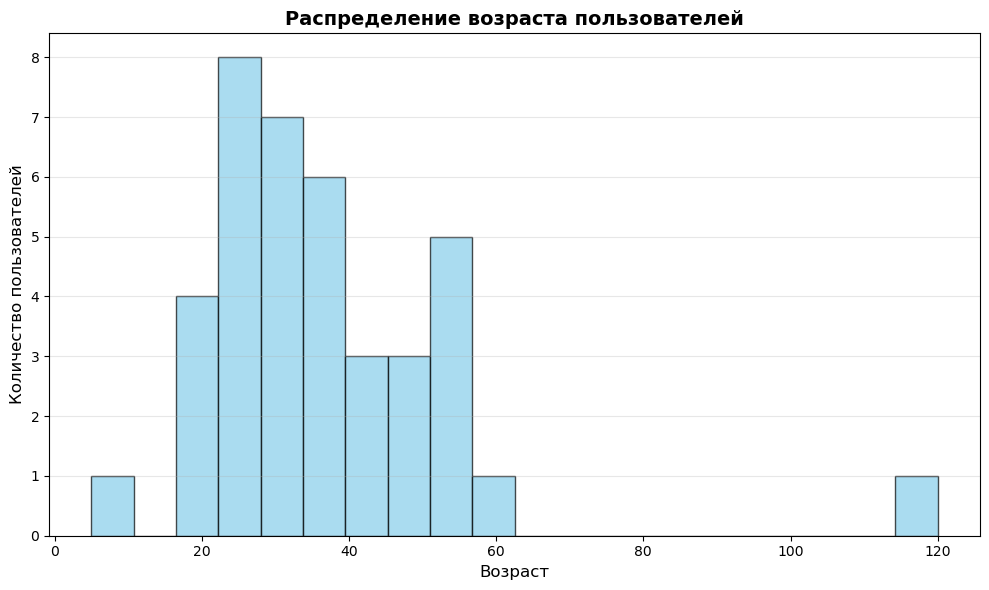

График сохранен в figures/age_histogram.png


In [17]:
# Гистограмма распределения возраста
plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=20, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.title('Распределение возраста пользователей', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('figures/age_histogram.png', dpi=150, bbox_inches='tight')
plt.show()
print("График сохранен в figures/age_histogram.png")


### 4.2. Боксплот  для количественного признака


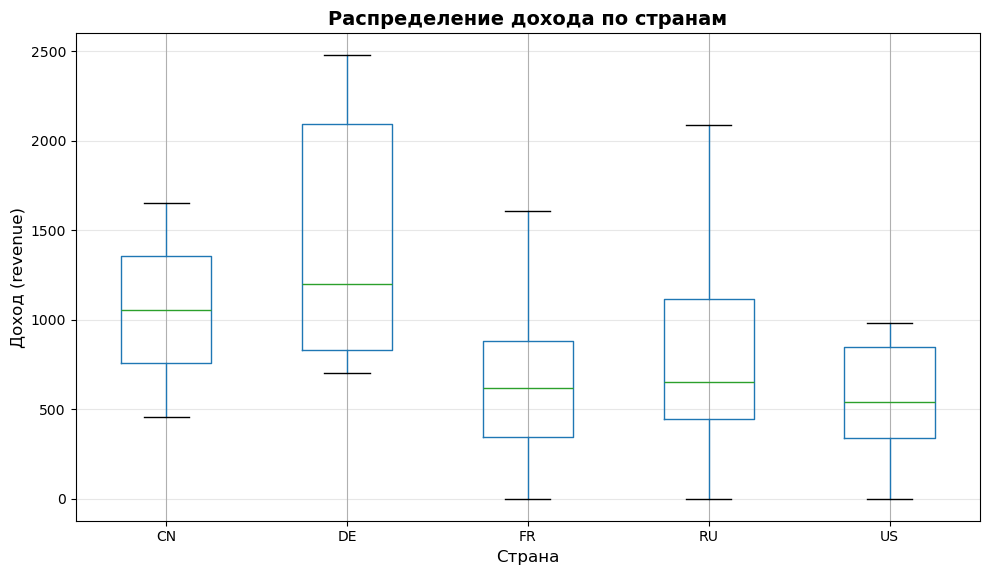

График сохранен в figures/revenue_boxplot_by_country.png


In [18]:
# Боксплот распределения дохода по странам
plt.figure(figsize=(10, 6))
df_plot = df[df['revenue'] >= 0].copy()  # Исключаем отрицательные значения для корректного отображения
df_plot.boxplot(column='revenue', by='country', ax=plt.gca())
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Доход (revenue)', fontsize=12)
plt.title('Распределение дохода по странам', fontsize=14, fontweight='bold')
plt.suptitle('')  # Убираем автоматический заголовок
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('figures/revenue_boxplot_by_country.png', dpi=150, bbox_inches='tight')
plt.show()
print("График сохранен в figures/revenue_boxplot_by_country.png")


### 4.3. Scatter plot (диаграмма рассеяния)


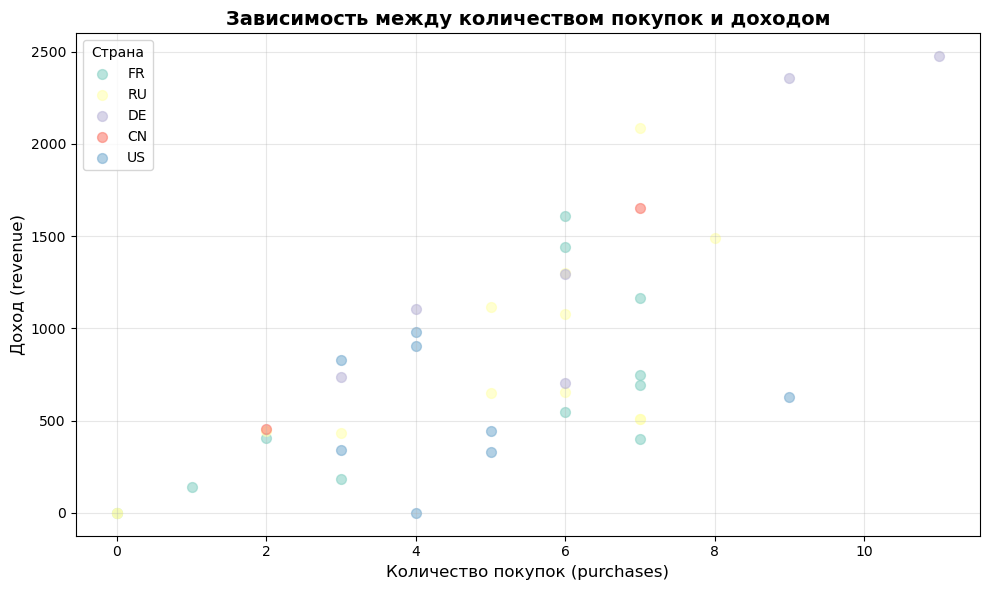

График сохранен в figures/purchases_vs_revenue_scatter.png


In [19]:
# зависимость между количеством покупок и доходом
plt.figure(figsize=(10, 6))
df_scatter = df[(df['purchases'] >= 0) & (df['revenue'] >= 0)].copy()  # Исключаем отрицательные значения

# Разные цвета для разных стран
countries = df_scatter['country'].unique()
colors = plt.cm.Set3(range(len(countries)))
country_color_map = dict(zip(countries, colors))

for country in countries:
    country_data = df_scatter[df_scatter['country'] == country]
    plt.scatter(country_data['purchases'], country_data['revenue'], 
               label=country, alpha=0.6, s=50, c=[country_color_map[country]])

plt.xlabel('Количество покупок (purchases)', fontsize=12)
plt.ylabel('Доход (revenue)', fontsize=12)
plt.title('Зависимость между количеством покупок и доходом', fontsize=14, fontweight='bold')
plt.legend(title='Страна', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('figures/purchases_vs_revenue_scatter.png', dpi=150, bbox_inches='tight')
plt.show()
print("График сохранен в figures/purchases_vs_revenue_scatter.png")
